In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data = data .iloc[:,2:]
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

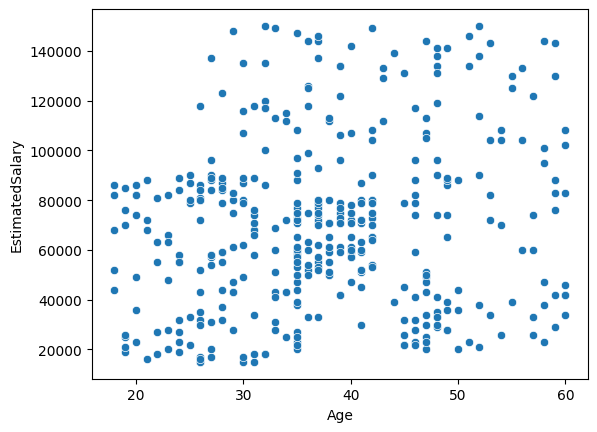

In [5]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary')

In [6]:
X = data.iloc[:,0:2]
y = data.iloc[:,-1]


In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.4250 - loss: 1252.1870 - val_accuracy: 0.6875 - val_loss: 306.3223
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5246 - loss: 212.0575 - val_accuracy: 0.6875 - val_loss: 142.6721
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5166 - loss: 127.6631 - val_accuracy: 0.6875 - val_loss: 40.8085
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4873 - loss: 35.7049 - val_accuracy: 0.6875 - val_loss: 25.0128
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6061 - loss: 35.5466 - val_accuracy: 0.3125 - val_loss: 27.9893
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4976 - loss: 17.4467 - val_accuracy: 0.3125 - val_loss: 24.6001
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4760 - loss: 20.9806 - val_accuracy: 0.3125 - val_loss: 48.6495
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5063 - loss: 24.14

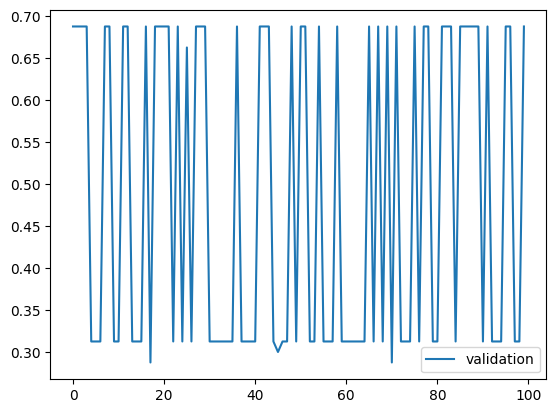

In [14]:

plt.plot(history.history['val_accuracy'])
plt.legend(['validation'])
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [16]:
X_train

array([[ 1.4167466 ,  2.15546758],
       [-0.26616955,  0.05500764],
       [ 0.38829784,  2.33297124],
       [ 0.66878386, -1.4241895 ],
       [ 0.85577455, -0.56625516],
       [ 0.38829784,  0.29167919],
       [ 0.10781182,  1.0608617 ],
       [ 0.01431647, -0.32958361],
       [ 0.2948025 , -0.21124784],
       [-0.17267421, -0.5958391 ],
       [-0.54665557,  1.38628507],
       [-1.29461831, -1.12835007],
       [-1.10762762,  0.05500764],
       [ 0.85577455,  2.18505153],
       [ 0.94926989, -1.09876613],
       [ 0.94926989,  1.80046027],
       [-0.73364626,  0.29167919],
       [ 1.97771865,  0.17334342],
       [ 0.76227921, -0.86209458],
       [-1.01413228, -0.35916756],
       [-0.35966489,  1.23836536],
       [-1.85559036,  0.35084707],
       [-1.01413228, -0.47750333],
       [-1.20112297,  0.26209524],
       [ 1.8842233 , -1.39460555],
       [-0.54665557,  1.91879604],
       [-1.10762762, -1.57210921],
       [ 0.38829784,  1.12002959],
       [-0.64015092,

In [17]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6494 - loss: 0.6791 - val_accuracy: 0.8125 - val_loss: 0.6386
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8589 - loss: 0.6202 - val_accuracy: 0.8125 - val_loss: 0.5936
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8281 - loss: 0.5745 - val_accuracy: 0.8125 - val_loss: 0.5544
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8712 - loss: 0.5239 - val_accuracy: 0.8000 - val_loss: 0.5199
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 0.4955 - val_accuracy: 0.7875 - val_loss: 0.4901
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8709 - loss: 0.4496 - val_accuracy: 0.8000 - val_loss: 0.4641
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8494 - loss: 0.4401 - val_accuracy: 0.8125 - val_loss: 0.4415
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8474 - loss: 0.4012 - val_accuracy: 0.8125 - 

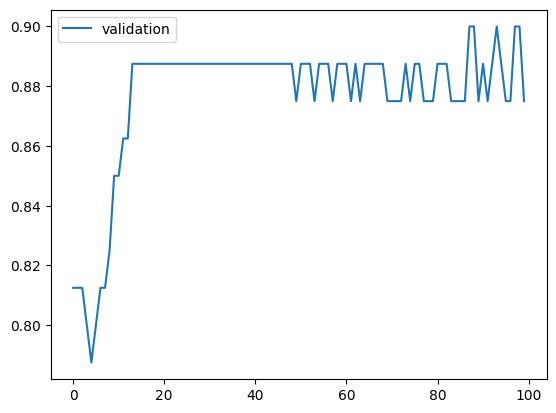

In [20]:
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'])
plt.show()